In [36]:
import thinkdsp
import thinkplot
import thinkstats2

import numpy as np


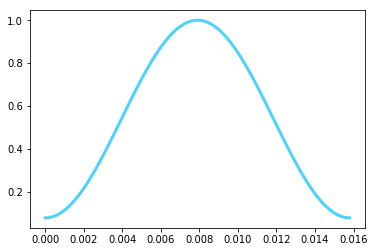

In [37]:
hamming = thinkdsp.Wave( ys=np.hamming(80), ts=np.arange(80))
hamming.__init__(ys=hamming.ys, framerate=5000)
hamming.plot()

In [41]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import time
from IPython import display
%matplotlib inline
beta = 3
i = 84
ys_dict = {}
wave_dict = {}
spectrum_dict = {}
while True:
 time_start=time.time()   
 try:
   plt.clf()
   ample = np.loadtxt('五指张100.txt')
   if ample.shape==(6,5000):
       ys_5 = ample[5]
       ts = np.arange((len(ys_5)))
       wave = thinkdsp.Wave(framerate=5000, ts=ts, ys=ys_5)
       wave.unbias()
       wave.ys=wave.ys**2
       convolve_0 = wave.convolve(hamming)
       #convolve_0.plot()
       if np.max(convolve_0.ys) > beta:
        
         for n in range(6):
                
            ys_dict ["ys_"+str(n)] =  ample[n]
            wave_dict ["wave_"+str(n)] = thinkdsp.Wave(framerate=5000, 
                                ys=ys_dict["ys_"+str(n)],ts=np.arange((len(ys_dict["ys_"+str(n)]))))
            spectrum_dict ["spectrum_"+str(n)] =  wave_dict["wave_"+str(n)].make_spectrum()
            spectrum_dict["spectrum_"+str(n)].fs = spectrum_dict["spectrum_"+str(n)].fs[0:400]
            spectrum_dict["spectrum_"+str(n)].hs = spectrum_dict["spectrum_"+str(n)].hs[0:400]
            wave_dict["wave_"+str(n)] = spectrum_dict["spectrum_"+str(n)].make_wave()
            
         spectrum = np.abs([spectrum_dict["spectrum_"+str(t)].hs  for t in range(6)])
         np.savetxt('向右\向右_'+str(i)+'.txt', spectrum, fmt = '%g', newline='\n')
         i = i+1
         wave_dict["wave_2"].plot()
          
         
      
   display.display(plt.gcf())
   display.clear_output(wait=True)
   time.sleep(0.8)
   time_end=time.time()

   print('totally cost',time_end-time_start)
   print('i = ',i)
 except KeyboardInterrupt:
   break                            

<Figure size 432x288 with 0 Axes>

In [33]:
hs = np.loadtxt("向右\向右_37.txt") 
hs_0 = hs[4]
fs = np.arange((len(hs_0)))
spectrum = thinkdsp.Spectrum(framerate=5000, fs=fs, hs=hs_0)
wave = spectrum.make_wave()
hs_0.shape


(400,)

In [26]:
wave_dict

{'wave_5': <thinkdsp.Wave at 0x1b2e7d14940>}

In [74]:
spectrum = np.real([spectrum_dict["spectrum_0"].hs for t in range(6)])

In [76]:
spectrum.shape

(6, 2501)

In [11]:
spectrum = np.abs([spectrum_dict["spectrum_"+str(t)].hs  for t in range(6)])

KeyError: 'spectrum_1'

In [123]:
spectrum.shape

(6, 400)